# Visualizing missingness across a variable


In [41]:
#import
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from numpy.random import rand
import numpy as np
from numpy.random import rand

In [17]:
#read_data
diabetes = pd.read_csv("../datasets/pima-indians-diabetes data.csv")
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


### Filling dummy Values


In [18]:
BMI_nul =diabetes['BMI'].isnull()
num_nulls=BMI_nul.sum()
num_nulls

11

In [27]:
#generate random values 
dummy_values = rand(num_nulls)
dummy_values

array([0.78986719, 0.61271745, 0.41023611, 0.40106209, 0.12740765,
       0.62634957, 0.82806753, 0.07625184, 0.13554125, 0.36132844,
       0.97982582])

In [28]:
#shift -1 & -1
dummy_values =dummy_values -2 
dummy_values

array([-1.21013281, -1.38728255, -1.58976389, -1.59893791, -1.87259235,
       -1.37365043, -1.17193247, -1.92374816, -1.86445875, -1.63867156,
       -1.02017418])

In [31]:
BMI=diabetes['BMI']
BMI

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [32]:
#scala to 0.75 of column Rang
BMI_range  = BMI.max() - BMI.min()
dummy_values =dummy_values* 0.75 * BMI_range

In [33]:
dummy_values


array([-44.38162098, -50.87858747, -58.30459054, -58.64104778,
       -68.67732454, -50.37862936, -42.98062323, -70.55346389,
       -68.37902458, -60.0982796 , -37.41488816])

In [39]:
# Shift to Column Minimum
dummy_values = (rand(num_nulls) - 2) * 0.075 * BMI_range + BMI.min()

In [40]:
dummy_values

array([12.53420721, 13.43835258, 11.56081959, 10.89979084, 13.23783178,
       13.86040487, 13.65988057, 11.62103263, 12.4402223 , 12.57866521,
       11.16019389])

In [42]:
def fill_dummy_values(df, scaling_factor):
    # Create copy of dataframe
    df_dummy = df.copy(deep=True)
    # Iterate over each column
    for col in df_dummy:
        # Get column, column missing values and range
        col = df_dummy[col]
        col_null = col.isnull()
        num_nulls = col_null.sum()
        col_range = col.max() - col.min()
        # Shift and scale dummy values
        dummy_values = (rand(num_nulls) - 2)
        dummy_values = dummy_values * scaling_factor * col_range + col.min()
        # Return dummy values
        col[col_null] = dummy_values
    return df_dummy

C:\Users\DELL\AppData\Local\Temp\ipykernel_12188\2247364350.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col_null] = dummy_values


<AxesSubplot:xlabel='Serum_Insulin', ylabel='BMI'>

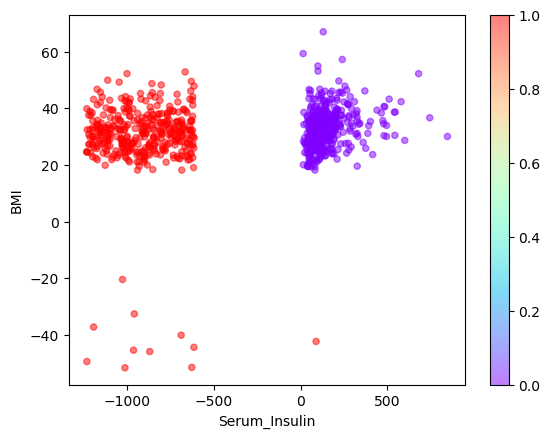

In [50]:
# Create dummy dataframe
diabetes_dummy = fill_dummy_values(diabetes ,0.75)
# Get missing values of both columns for coloring
nullity=diabetes.Serum_Insulin.isnull()+diabetes.BMI.isnull()
# Generate scatter plot
diabetes_dummy.plot(x='Serum_Insulin', y='BMI', kind='scatter', alpha=0.5,c=nullity, cmap='rainbow')

## Exercise

### Fill dummy values


In [51]:
def fill_dummy_values(df):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    # Calculate column range
    col_range = col.max() - col.min()
  return df_dummy

In [53]:
def fill_dummy_values(df):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    # Calculate column range
    col_range = col.max() - col.min()
    # Calculate the number of missing values in column 
    col_null = col.isnull()    
    num_nulls = col_null.sum()
  return df_dummy

In [55]:
def fill_dummy_values(df):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    # Calculate column range
    col_range = col.max() - col.min()
    # Calculate number of missing values in column 
    col_null = col.isnull()    
    num_nulls = col_null.sum()
    # Create random values of size num_nulls
    dummy_values = (rand(num_nulls) - 2)
  return df_dummy

In [56]:
def fill_dummy_values(df, scaling_factor=0.075):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    # Calculate column range
    col_range = col.max() - col.min()
    # Calculate number of missing values in column 
    col_null = col.isnull()    
    num_nulls = col_null.sum()
    # Scale the random values to scaling_factor times col_range
    dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
    col[col_null] = dummy_values
  return df_dummy

### Generate scatter plot with missingness


C:\Users\DELL\AppData\Local\Temp\ipykernel_12188\1348116578.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col_null] = dummy_values


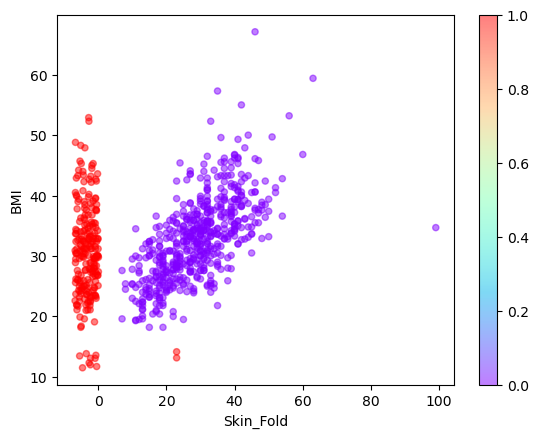

In [57]:
# Fill dummy values in diabetes_dummy
diabetes_dummy = fill_dummy_values(diabetes)

# Sum the nullity of Skin_Fold and BMI
nullity = diabetes['Skin_Fold'].isnull() + diabetes['BMI'].isnull()

# Create a scatter plot of BMI versus Skin_Fold
diabetes_dummy.plot(x='Skin_Fold', y='BMI', kind='scatter', alpha=0.5,
                    
                    # Set color to nullity of BMI and Skin_Fold
                    c=nullity, 
                    cmap='rainbow')

plt.show()